<a href="https://colab.research.google.com/github/divyaJ11/dphi_ml_datathon/blob/main/Cancer_death_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

### Import Libraries

In [ ]:
# for scientific computations
import numpy as np
from statistics import mean

# for data manipulation
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# for selection of important features 
from sklearn.feature_selection import SelectFromModel

# for evaluation
from sklearn import metrics

### Load the data and display first 5 rows.

In [ ]:
# load the data

cancer_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv")
cancer_data.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [ ]:
# test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

### Perform Exploratory Data Analysis

**About the data**

The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

* **`TARGET_deathRate`**: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
***`avgAnnCount`**: Mean number of reported cases of cancer diagnosed annually(a)
* **`avgDeathsPerYear`**  : Mean number of reported mortalities due to cancer(a)
* **`incidenceRate`**: Mean per capita (100,000) cancer diagoses(a)
* **`medianIncome`**: Median income per county (b)
* **`popEst2015`**: Population of county (b)
* **`povertyPercent`**: Percent of populace in poverty (b)
* **`studyPerCap`**: Per capita number of cancer-related clinical trials per county (a)
* **`binnedInc`**: Median income per capita binned by decile (b)
* **`MedianAge`**: Median age of county residents (b)
* **`MedianAgeMale`**: Median age of male county residents (b)
* **`MedianAgeFemale`**: Median age of female county residents (b)
* **`Geography`**: County name (b)
* **`AvgHouseholdSize`**: Mean household size of county (b)
* **`PercentMarried`**: Percent of county residents who are married (b)
* **`PctNoHS18_24`**` Percent of county residents ages 18-24 highest education attained: less than high school (b)
* **`PctHS18_24`**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
* **`PctSomeCol18_24`**: Percent of county residents ages 18-24 highest education attained: some college (b)
* **`PctBachDeg18_24`** Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
* **`PctHS25_Over`**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
* **`PctBachDeg25_Over`**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
* **`PctEmployed16_Over`**: Percent of county residents ages 16 and over employed (b)
* **`PctUnemployed16_Over`**: Percent of county residents ages 16 and over unemployed (b)
* **`PctPrivateCoverage`**: Percent of county residents with private health coverage (b)
* **`PctPrivateCoverageAlone`**: Percent of county residents with private health coverage alone (no public assistance) (b)
* **`PctEmpPrivCoverage`**: Percent of county residents with employee-provided private health coverage (b)
* **`PctPublicCoverage`**: Percent of county residents with government-provided health coverage (b)
* **`PctPubliceCoverageAlone`**: Percent of county residents with government-provided health coverage alone (b)
* **`PctWhite`**: Percent of county residents who identify as White (b)
* **`PctBlack`**: Percent of county residents who identify as Black (b)
* **`PctAsian`**: Percent of county residents who identify as Asian (b)
* **`PctOtherRace`**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
* **`PctMarriedHouseholds`**: Percent of married households (b)
* **`BirthRate`**: Number of live births relative to number of women in county (b)

> **(a):** years 2010-2016



> **(b):** 2013 Census Estimates



In [ ]:
X_train.info()

Observations:

Columns = 34 (33 independent + 1 dependent)

Rows = 3052

In [ ]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

3 columns have null values. 

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [ ]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [ ]:
test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,182.000000,762.000000,762.000000,762.000000,729.000000,762.000000,762.000000,614.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,711.605491,220.711286,447.204162,47029.500000,1.282696e+05,16.980315,147.999759,47.133858,39.620997,42.022178,2.500591,51.539108,18.150394,35.191207,40.574176,6.231102,34.533333,13.391207,54.027435,7.967585,63.701050,47.805700,40.608661,36.477428,19.569554,82.788278,8.896343,1.340419,2.254919,50.926053,5.736898
std,1940.045693,695.011673,56.745238,11986.997138,4.792013e+05,6.536684,480.782424,56.374276,5.469577,5.491687,0.403520,7.181519,7.939906,9.011131,11.438374,4.225098,7.113428,5.503342,8.535290,3.534852,11.037942,10.386014,9.816577,8.237832,6.459500,17.320289,14.432993,2.972052,4.090086,6.800150,2.065069
min,7.000000,3.000000,201.300000,24707.000000,1.337000e+03,4.000000,0.000000,23.300000,22.800000,22.800000,0.024000,23.100000,1.500000,7.100000,10.100000,0.000000,11.500000,2.500000,23.900000,0.700000,22.300000,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,1.075350e+04,12.300000,0.000000,37.500000,36.225000,38.900000,2.370000,47.700000,12.700000,29.125000,33.700000,3.225000,29.625000,9.500000,48.100000,5.800000,56.300000,39.950000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.500000,60.000000,453.549422,45238.500000,2.611850e+04,15.800000,0.000000,41.100000,39.800000,42.350000,2.500000,52.250000,17.100000,35.000000,39.300000,5.500000,34.950000,12.300000,54.600000,7.500000,64.300000,48.250000,40.600000,36.600000,18.950000,89.464327,2.120925,0.538765,0.846727,51.336903,5.367187
75%,535.750000,151.000000,479.875000,52310.500000,7.086150e+04,20.400000,80.313645,44.275000,42.875000,45.500000,2.640000,56.100000,22.975000,40.575000,45.475000,8.375000,39.500000,16.100000,60.100000,9.900000,71.800000,55.500000,47.275000,42.175000,23.775000,95.162772,10.811476,1.325862,2.382843,55.208111,6.583930
max,38150.000000,14010.000000,1014.200000,103876.000000,1.017029e+07,47.400000,6810.442679,624.000000,58.600000,58.000000,3.970000,72.300000,59.100000,66.200000,78.300000,32.600000,50.200000,42.200000,80.100000,25.400000,87.900000,76.300000,68.800000,62.200000,43.300000,99.693045,85.947799,42.619425,41.930251,78.075397,18.556701


**Correlation Heatmap using Seaborn**

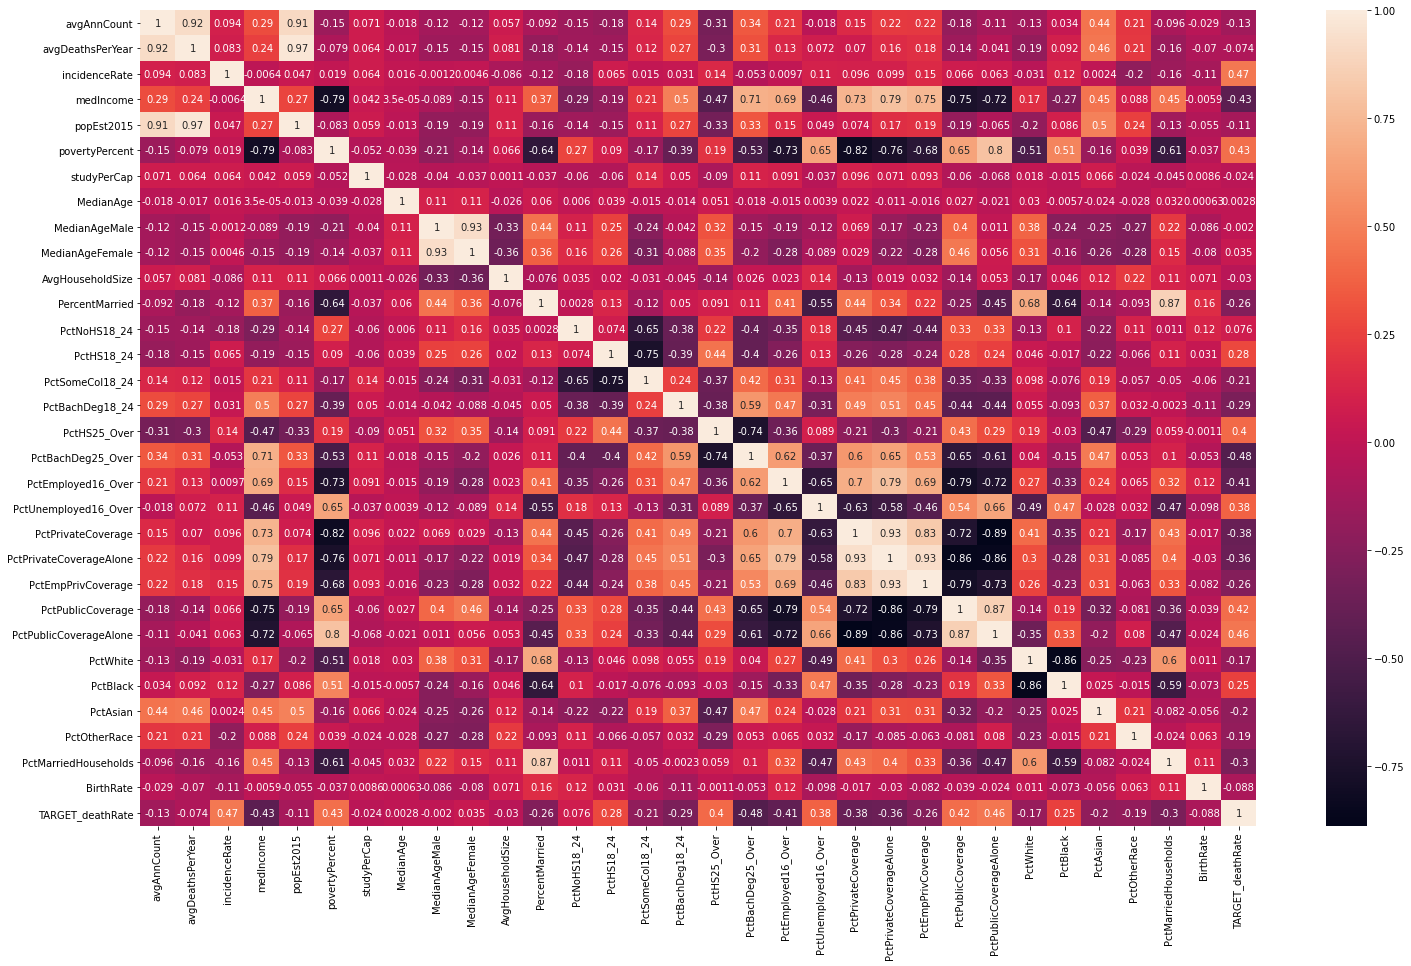

In [ ]:
# correlation

cancer_corr_matrix = cancer_data.corr()
plt.figure(figsize=[25,15])
sns.heatmap(cancer_corr_matrix, annot = True)

**Examine the relationship of each feature against the target. We can do this through sns.regplot(). regplot() will also try to draw a best fit line to show the linear relationship between each feature and the target.**

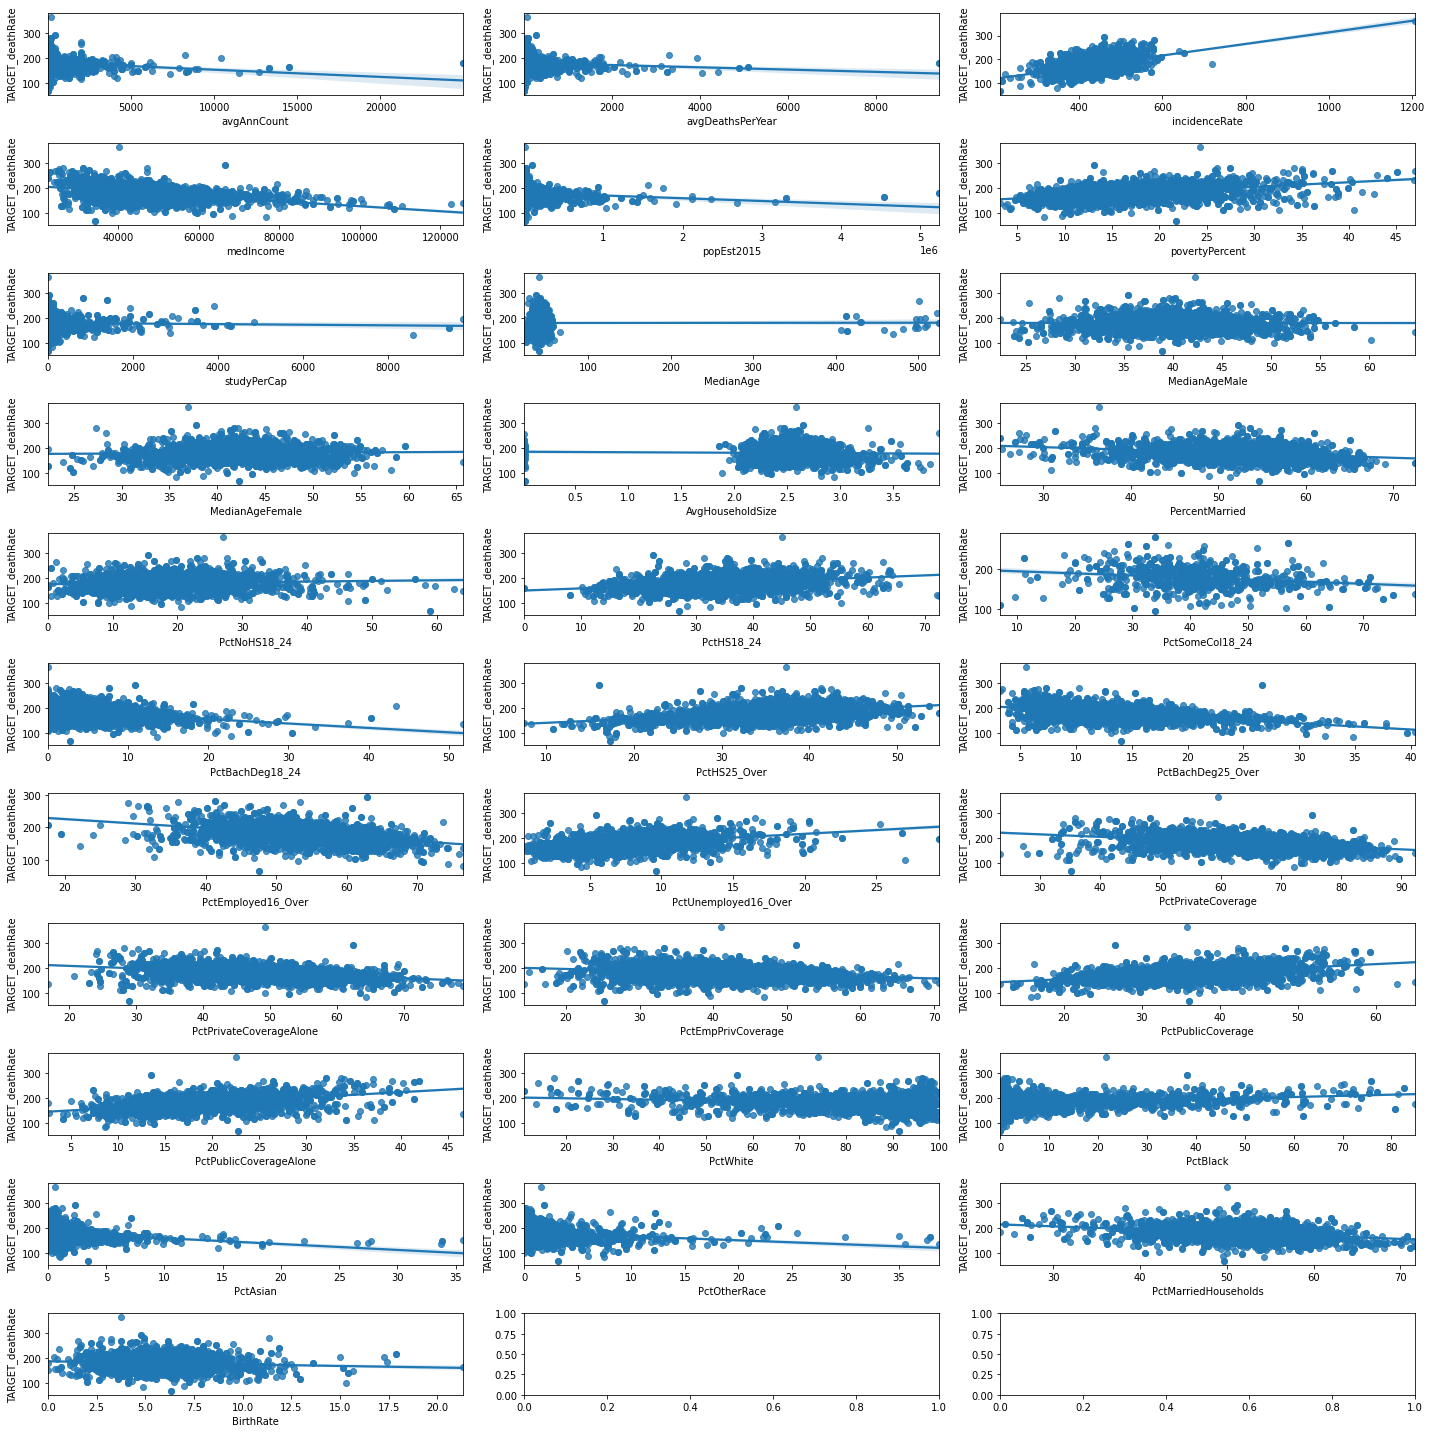

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 11, figsize = (20, 20))

r = 0
c = 0
for col in cancer_data.columns:
  if cancer_data[col].dtype != object and col != "TARGET_deathRate":
    sns.regplot(y = cancer_data.TARGET_deathRate, x = cancer_data[col], ax=axs[r,c] )
    c+=1
    if c == 3:
      c=0
      r+=1

plt.tight_layout()

**Examining outliers using box plots**

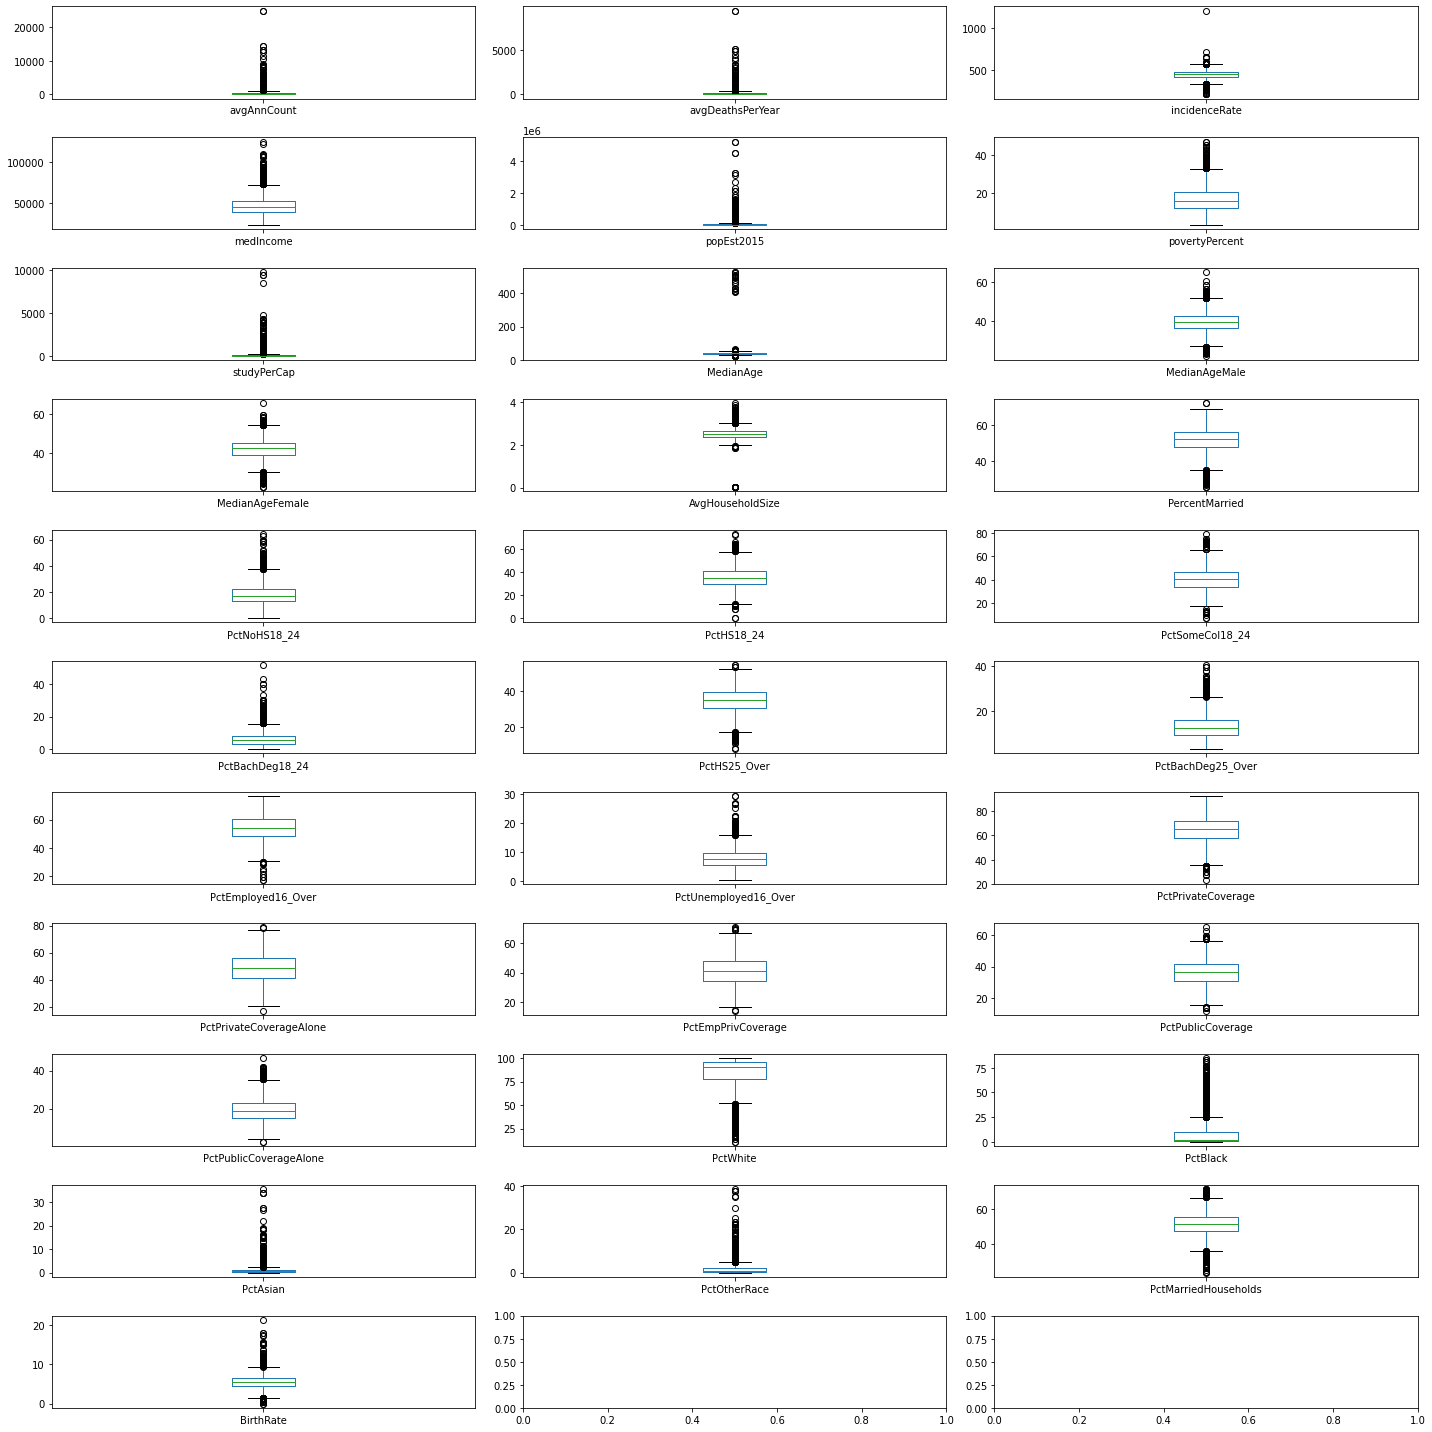

In [ ]:
# for training data
fig, axs = plt.subplots(ncols = 3, nrows = 11, figsize = (20, 20))

r = 0
c = 0
for col in cancer_data.columns:
  if cancer_data[col].dtype != object and col != "TARGET_deathRate":
    cancer_data[col].plot(kind = "box", ax = axs[r,c])
    c+=1
    if c == 3:
      c=0
      r+=1

plt.tight_layout()


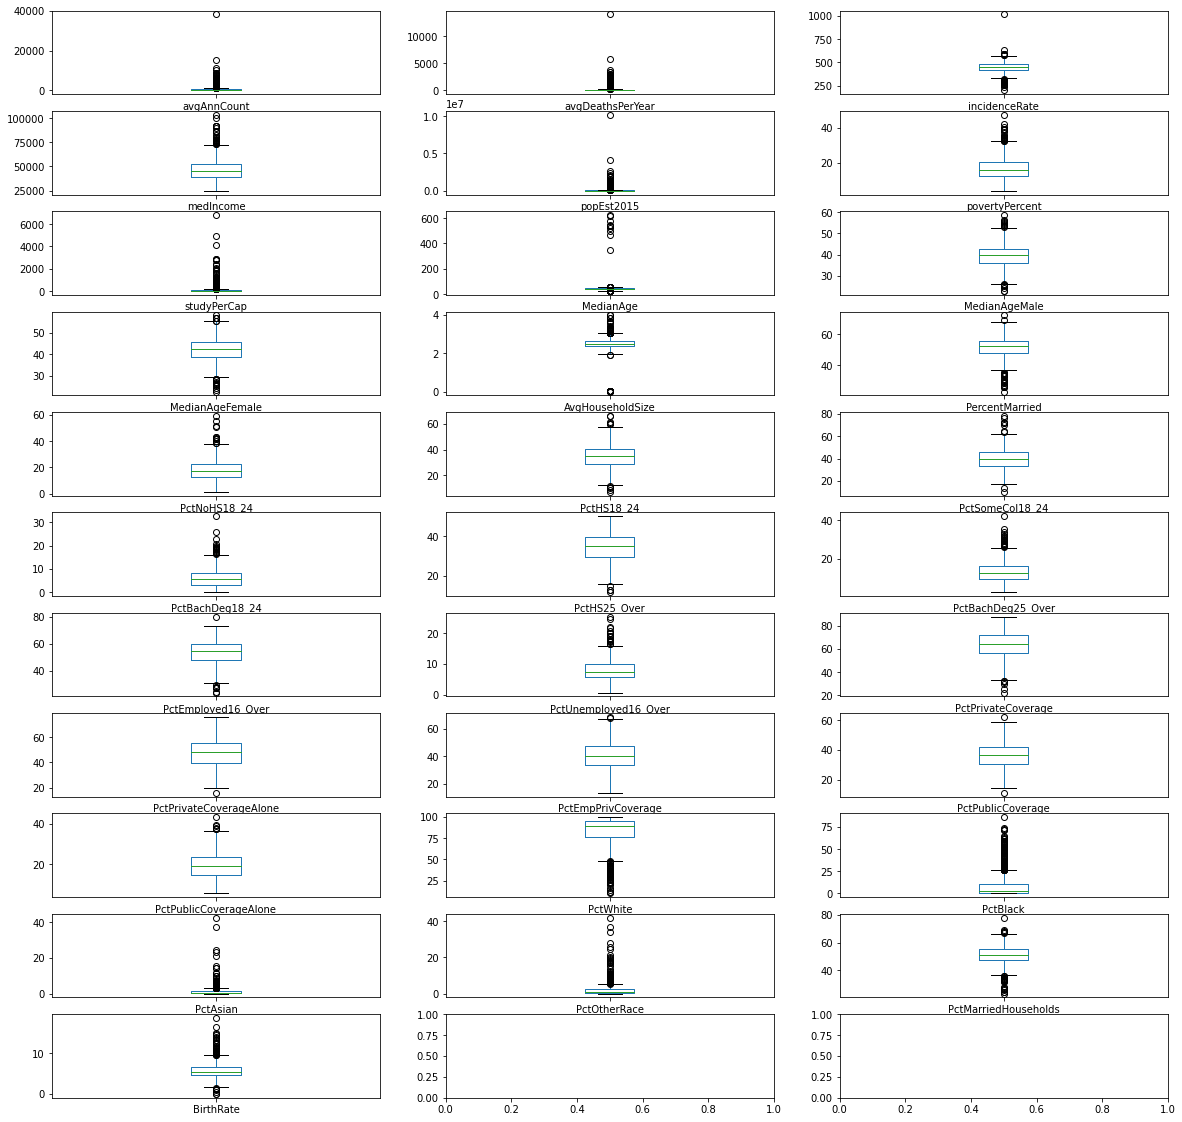

In [ ]:
# for test data
fig, axs = plt.subplots(ncols = 3, nrows = 11, figsize = (20, 20))

r = 0
c = 0
for col in test_data.columns:
  if test_data[col].dtype != object:
    test_data[col].plot(kind = "box", ax=axs[r,c])
    c+=1
    if c == 3:
      c=0
      r+=1


**From the plot we can observe that the following features have outliers:**
 1. medianAge
 2. incidenceRate
 3. avgAnnCount
 4. avgDeathsPerYear

In [ ]:
print("No of entries having median age greater than 100")
print(cancer_data[cancer_data.MedianAge>100].size)

print("No of entries having median age greater than 100 in test data")
print(test_data[test_data.MedianAge>100].size)

No of entries having median age greater than 100
816
No of entries having median age greater than 100 in test data
330


**Visualizing ouliers using box plot**

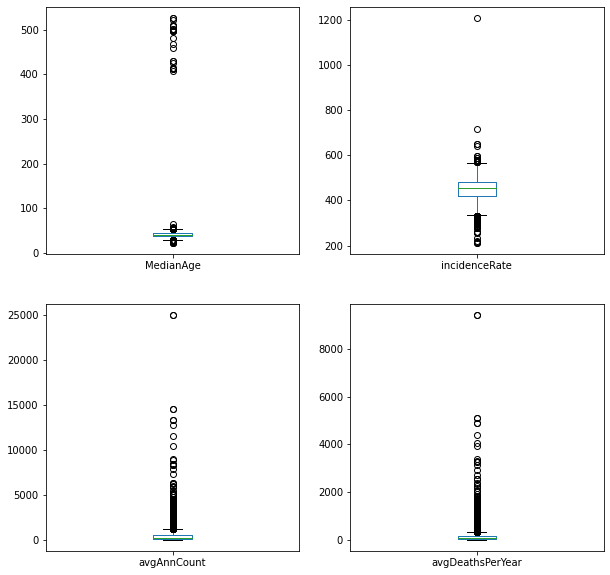

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize = (10,10))
cancer_data.MedianAge.plot(kind = "box", ax = axs[0,0])

cancer_data.incidenceRate.plot(kind ="box", ax = axs[0,1])

cancer_data.avgAnnCount.plot(kind ="box", ax = axs[1,0])

cancer_data.avgDeathsPerYear.plot(kind ="box", ax = axs[1,1])

plt.show()

### Separate the Input and Target Features of the data

In [ ]:
X_train = cancer_data.drop(["TARGET_deathRate"], axis =1)
y_train = cancer_data["TARGET_deathRate"]

print("Shape of X (features): ", X_train.shape)
print("Shape of y (label): ", y_train.shape)

Shape of X (features):  (3051, 33)
Shape of y (label):  (3051,)


## Task 2

### Perform Data Preparation Steps

#### Handling outliers using column imputation

**Handling outliers in `MedianAge`**

Substitute the outliers with the median of records having MedianAge value < 100

In [ ]:
median_train = X_train[X_train.MedianAge<100].MedianAge.median()
print("Median of median age for train set :", median_train)

median_test = test_data[test_data.MedianAge<100].MedianAge.median()
print("Median of median age for test set :", median_test)

Median of median age for train set : 40.9
Median of median age for test set : 41.0


In [ ]:
# imputation
X_train.loc[(X_train.MedianAge >= 100),'MedianAge'] = median_train
print("Entries having median age > 100 in train set= ",X_train[X_train.MedianAge>100].size)

test_data.loc[(test_data.MedianAge >= 100),'MedianAge'] = median_test
print("Entries having median age > 100 in test set= ",test_data[test_data.MedianAge>100].size)

Entries having median age > 100 in train set=  0
Entries having median age > 100 in test set=  0


In [ ]:
X_train.MedianAge.plot(kind = "box")
plt.show()

test_data.MedianAge.plot(kind = "box")
plt.show()

**Handling outliers in `incidenceRate`**

In [ ]:
mean_incidence_train = X_train[X_train.incidenceRate<800].incidenceRate.mean()
mean_incidence_test = test_data[test_data.incidenceRate<800].incidenceRate.mean()
print("Mean incidence rate train set: ", mean_incidence_train)
print("Mean incidence rate test set: ", mean_incidence_test)

Mean incidence rate train set:  448.7585522688509
Mean incidence rate test set:  446.4590947503287


In [ ]:
# imputation
X_train.loc[(X_train.incidenceRate > 800), "incidenceRate"] = mean_incidence_train
test_data.loc[(test_data.incidenceRate > 800), "incidenceRate"] = mean_incidence_test

print("Entries having incidence rat > 800 in train set= ",X_train[X_train.incidenceRate>1000].size)
print("Entries having incidence rate > 800 in test set= ",test_data[test_data.incidenceRate>1000].size)

Entries having incidence rat > 800 in train set=  0
Entries having incidence rate > 800 in test set=  0


In [ ]:
X_train.incidenceRate.plot(kind = "box")
plt.show()

test_data.incidenceRate.plot(kind = "box")
plt.show()

**Handling outliers in `avgAnncount`**




In [ ]:
mean_avgAnnCount_train = X_train[X_train.avgAnnCount<2000].avgAnnCount.mean()
mean_avgAnnCount_test = test_data[test_data.avgAnnCount<2000].avgAnnCount.mean()
print("Mean avgAnnCount train set: ", mean_avgAnnCount_train)
print("Mean avgAnnCount test set: ", mean_avgAnnCount_test)

Mean avgAnnCount train set:  392.31593726027313
Mean avgAnnCount test set:  378.2832407876226


In [ ]:
# imputation
X_train.loc[(X_train.avgAnnCount > 2000), "avgAnnCount"] = mean_avgAnnCount_train
test_data.loc[(test_data.avgAnnCount > 2000), "avgAnnCount"] = mean_avgAnnCount_test

print("Entries having avgAnnCount > 2000 in train set= ",X_train[X_train.avgAnnCount>2000].size)
print("Entries having avgAnnCount > 2000 in test set= ",test_data[test_data.avgAnnCount>2000].size)

Entries having avgAnnCount > 2000 in train set=  0
Entries having avgAnnCount > 2000 in test set=  0


In [ ]:
X_train.avgAnnCount.plot(kind = "box")
plt.show()

test_data.avgAnnCount.plot(kind = "box")
plt.show()

**Handling outliers in `avgDeathsPerYear`**


In [ ]:
mean_avgDeathsPerYear_train = X_train[X_train.avgDeathsPerYear<8000].avgDeathsPerYear.mean()
mean_avgDeathsPerYear_test = test_data[test_data.avgDeathsPerYear<8000].avgDeathsPerYear.mean()
print("Mean avgDeathsPerYear train set: ", mean_avgDeathsPerYear_train)
print("Mean avgDeathsPerYear test set: ", mean_avgDeathsPerYear_test)

Mean avgDeathsPerYear train set:  169.92095769104625
Mean avgDeathsPerYear test set:  202.59132720105126


In [ ]:
# imputation
X_train.loc[(X_train.avgDeathsPerYear > 8000), "avgDeathsPerYear"] = mean_avgDeathsPerYear_train
test_data.loc[(test_data.avgDeathsPerYear > 8000), "avgDeathsPerYear"] = mean_avgDeathsPerYear_test

print("Entries having avgDeathsPerYear > 8000 in train set= ",X_train[X_train.avgDeathsPerYear>8000].size)
print("Entries having avgDeathsPerYear > 8000 in test set= ",test_data[test_data.avgDeathsPerYear>8000].size)

Entries having avgDeathsPerYear > 8000 in train set=  0
Entries having avgDeathsPerYear > 8000 in test set=  0


In [ ]:
X_train.avgDeathsPerYear.plot(kind = "box")
plt.show()

test_data.avgDeathsPerYear.plot(kind = "box")
plt.show()

####**Handling missing values**

In [ ]:
for col in X_train.columns:
  if X_train[col].isnull().sum()>0:
    print(col," : ",X_train[col].isnull().sum())

PctSomeCol18_24  :  2266
PctEmployed16_Over  :  152
PctPrivateCoverageAlone  :  604


**PctSomeCol18_24** has a lot of missing values (2266). If we impute it, it will be simillar to faking a majority of values. Dropping it is the best option. 

In [ ]:
# dropping PctSomeCol18_24 from train and test set
X_train.drop(["PctSomeCol18_24"], axis =1, inplace = True)
test_data.drop(["PctSomeCol18_24"], axis =1, inplace = True)
print(X_train.shape)
test_data.shape

(3051, 32)


(762, 32)

**PctEmployed16_Over** has 152 missing values which can be imputed with the **mean value**. Same is applicable for **PctPrivateCoverageAlone** with 604 missing values.



In [ ]:
fill_values_train = { "PctEmployed16_Over": X_train.PctEmployed16_Over.mean(),
                      "PctPrivateCoverageAlone": X_train.PctPrivateCoverageAlone.mean()}

fill_values_test = { "PctEmployed16_Over": test_data.PctEmployed16_Over.mean(),
                      "PctPrivateCoverageAlone": test_data.PctPrivateCoverageAlone.mean()}

X_train.fillna(fill_values_train, inplace = True)
test_data.fillna(fill_values_test, inplace = True)

In [ ]:
X_train.isnull().sum()

# no missing values in the set

In [ ]:
test_data.isnull().sum()

####**Handling duplicates**

In [ ]:
print("Total duplicates: ")
X_train.duplicated().sum()

Total duplicates: 


766

In [ ]:
print("Total duplicates test: ")
test_data.duplicated().sum()

Total duplicates test: 


0

The data has 700+ duplicates, removing all of them will reduce the dataset size and may affect the model performance. Thus, dont drop them.

####**Adding `binned_mean`, `binned_min` and `binned_max` column that stores the mean value, minimum value and maximum value respectively of coressponsing entry in `binnedInc` column (which is of object type).**

In [ ]:
# for X_train
mean_list = []
min_list = []
max_list = []
for val in X_train.binnedInc:
  nums = val.replace("(", "").replace("]","").replace( ")", "").replace("[","").split(",")
  nums = list(map(float,nums))
  mean_list.append(mean(nums))
  min_list.append(min(nums))
  max_list.append(max(nums))


X_train["binned_mean"] = mean_list
X_train["binned_min"] = min_list
X_train["binned_max"] = max_list

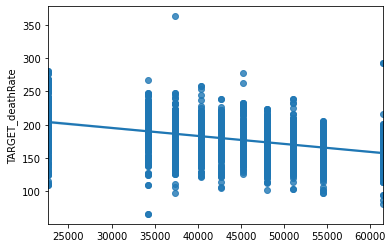

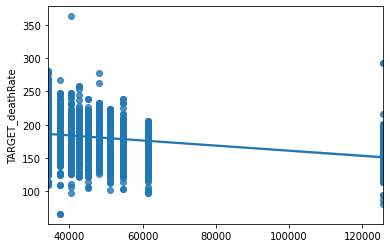

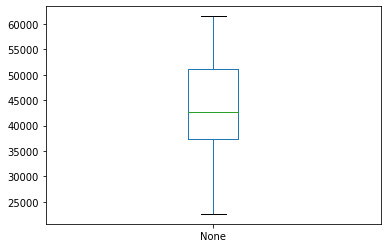

In [ ]:
# visualising the linearity of the newly added columns with the target column

sns.regplot(y = y_train, x = min_list)
plt.show()
sns.regplot(y = y_train, x = max_list)
plt.show()
pd.Series(min_list).plot(kind = "box")
plt.show()
# there are no outliers in "binned_min","binned_max" columns
y_train.corr(pd.Series(max_list))
# gives very low correlation

In [ ]:
X_train.shape

(3051, 35)

In [ ]:
#X_train

In [ ]:
# for test_data
mean_list = []
min_list = []
max_list = []
for val in test_data.binnedInc:
  nums = val.replace("(", "").replace("]","").replace( ")", "").replace("[","").split(",")
  nums = list(map(float,nums))
  mean_list.append(mean(nums))
  min_list.append(min(nums))
  max_list.append(max(nums))
test_data["binned_mean"] = mean_list
test_data["binned_min"] = min_list
test_data["binned_max"] = max_list


In [ ]:
#test_data

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,binned_mean,binned_min,binned_max
0,378.283241,763.0,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,5.1,23.2,11.9,52.200000,9.9,32.6,47.8057,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886,35815.95,34218.1,37413.8
1,94.000000,41.0,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,8.3,47.1,7.9,46.500000,9.0,55.6,40.1000,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861,35815.95,34218.1,37413.8
2,126.000000,43.0,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,10.0,30.5,17.5,71.400000,2.8,83.3,68.0000,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567,93564.75,61494.5,125635.0
3,1962.667684,16.0,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,7.6,35.3,15.5,63.100000,4.3,75.8,55.3000,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231,46611.30,45201.0,48021.6
4,1962.667684,4.0,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",41.0,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,3.0,29.7,15.5,67.900000,2.4,78.2,56.7000,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499,52796.00,51046.4,54545.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,152.000000,70.0,501.800000,37625,23372,22.1,0.000000,"(37413.8, 40362.7]",41.9,41.2,43.2,"Boone County, West Virginia",2.50,55.2,21.3,42.9,5.2,49.4,5.4,39.500000,9.2,60.2,42.8000,41.3,46.3,25.4,98.312500,0.675000,0.091667,0.129167,53.063790,4.220288,38888.25,37413.8,40362.7
758,221.000000,85.0,496.500000,45596,31101,13.1,0.000000,"(45201, 48021.6]",44.9,43.7,46.1,"Marshall County, Kentucky",2.43,59.0,23.5,37.1,8.1,41.0,9.3,54.027435,7.7,68.2,50.5000,46.1,39.7,20.7,98.120650,0.426542,0.275809,0.035278,57.149659,4.006755,46611.30,45201.0,48021.6
759,186.000000,93.0,406.200000,37122,25345,19.0,0.000000,"(34218.1, 37413.8]",41.0,51.6,52.5,"Iosco County, Michigan",2.20,52.2,25.2,32.4,2.2,40.0,10.0,40.400000,12.1,61.4,34.2000,29.4,53.2,23.4,96.145821,0.625960,0.519665,0.141727,48.108966,4.012841,35815.95,34218.1,37413.8
760,361.000000,139.0,511.100000,35555,64051,27.4,0.000000,"(34218.1, 37413.8]",38.2,36.3,40.0,"Spalding County, Georgia",2.76,44.8,25.8,34.4,2.9,36.5,10.0,47.200000,12.4,54.3,41.6000,37.0,39.8,23.9,63.072034,32.896529,0.919011,1.097490,45.683849,5.051532,35815.95,34218.1,37413.8


***NOTE***: Adding these columns **didnot improve the performance.** The correlation is low and these 3 newly added features were **ranked the lowest** by all feature selection models. 

####**Dropping irrelevant columns**

In [ ]:
# dropping "Geography" and "binnedInc"

X_train.drop(["Geography", "binnedInc"], axis = 1, inplace = True)
test_data.drop(["Geography", "binnedInc"], axis = 1, inplace = True)

print(X_train.shape)
test_data.shape

(3051, 33)


(762, 33)

####**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
test_scaled = scaler.transform(test_data)
test_scaled_df = pd.DataFrame(test_scaled, columns=test_data.columns)


***Note***: Giving standardized data as input to the model **didnot improve performance**. One of the possible reasons is that **tree based models are not sensitive to scaled features**, their performance is not affected by scaling.

In [ ]:
#X_scaled_df

## Task 3

### Build any Machine Learning Model of your choice

**Building a Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# create object of random forest regressor
rfr = RandomForestRegressor(random_state = 1)

#fitting the training data
rfr.fit(X_train,y_train)

# predicting target 
train_pred = rfr.predict(X_train)
test_pred = rfr.predict(test_data)

### Evaluate your model with various Evaluation Metrics

In [ ]:
print("Train set:")
print("Mean absolute error = ", metrics.mean_absolute_error(train_pred, y_train))
print("Mean squared error = ", metrics.mean_squared_error(train_pred, y_train))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(train_pred, y_train)))
print("R2 score = ", metrics.r2_score(train_pred, y_train))


Train set:
Mean absolute error =  3.464091445427721
Mean squared error =  27.234148124877056
Root Mean squared error =  5.218634699313323
R2 score =  0.9550785047308757


In [ ]:
# rf baseline prediction file
prediction = pd.DataFrame(test_pred, columns = ["prediction"])
prediction.to_csv("prediction.csv", index = False)
#score = 394

### Try out other Machine Learning Models and Evaluate them

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(test_data)

In [ ]:
print("Train set:")
print("Mean absolute error = ", metrics.mean_absolute_error(train_pred_lr, y_train))
print("Mean squared error = ", metrics.mean_squared_error(train_pred_lr, y_train))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(train_pred_lr, y_train)))
print("R2 score = ", metrics.r2_score(train_pred_lr, y_train))

Train set:
Mean absolute error =  13.93540314756688
Mean squared error =  367.33417835700567
Root Mean squared error =  19.16596406020333
R2 score =  0.0641781279687631


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)

train_pred_dt = dt.predict(X_train)
test_pred_dt = dt.predict(test_data)

In [ ]:
print("Train set:")
print("Mean absolute error = ", metrics.mean_absolute_error(train_pred_dt, y_train))
print("Mean squared error = ", metrics.mean_squared_error(train_pred_dt, y_train))
print("Root Mean squared error = ", np.sqrt(metrics.mean_squared_error(train_pred_dt, y_train)))
print("R2 score = ", metrics.r2_score(train_pred_dt, y_train))

Train set:
Mean absolute error =  8.383985082715046e-17
Mean squared error =  2.3828718788976875e-30
Root Mean squared error =  1.543655362734081e-15
R2 score =  1.0


In [ ]:
# dt baseline preiction file
prediction = pd.DataFrame(test_pred_dt, columns = ["prediction"])
prediction.to_csv("prediction_dt.csv", index = False)
#score = 832

**Conclusion: Baseline Random forest has the least MSE of all models**

## Task 4

### Perform Hyperparameter Tuning

**Using GridSearchCv**

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
# parameters grid 

param_grid = {'bootstrap' : ["True"],
              'max_depth': [20, 23],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [4, 6],
              'n_estimators': [200, 250]}

In [ ]:
# initializing Grid search CV on the model "rfr" 
g_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)

# fitting the training data on g_search
train_grid = g_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  6.1min finished


In [ ]:
# best parameters
train_grid.best_params_

{'bootstrap': 'True',
 'max_depth': 23,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 250}

In [ ]:
# predicting the target using the grid model

# for train set
train_pred_grid = train_grid.predict(X_train)

# for test set
test_pred_grid = train_grid.predict(test_data)

In [ ]:
# rf with grid prediction file
prediction = pd.DataFrame(test_pred_grid, columns = ["prediction"])
prediction.to_csv("prediction_grid.csv", index = False)
#score = 398

**Observation:** Test prediction didnot improve after applying Grid Search CV

### Evaluate your model 

In [ ]:
print("GriddSearchCV\n")
print("Training data")
print("MAE: ", metrics.mean_absolute_error(train_pred_grid, y_train))
print("MSE: ", metrics.mean_squared_error(train_pred_grid, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(train_pred_grid, y_train)))
print("R2 score: ", metrics.r2_score(train_pred_grid, y_train))

GriddSearchCV


Training data
MAE:  4.5838958679072395
MSE:  55.26882573638494
RMSE:  7.434300621873247
R2 score:  0.8993353281664476


## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

#### **Using Boruta**

In [ ]:
# import boruta feature selector

!pip install Boruta
from boruta import BorutaPy

In [ ]:
# Step 1: initializing random forest model

random_forest = RandomForestRegressor(random_state=1)
# Step 2: initializing boruta selector
boruta_selector = BorutaPy(random_forest, n_estimators="auto", random_state=1, verbose=2)

# Step 3: fitting the boruta selector
# boruta accepts numpy arrays only
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	13
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	6
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	6
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	6
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	6
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	24
Tentative: 	4
Rejected: 

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=74, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7FEBB8D28BA0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [ ]:
# number of features selected by boruta
print("No. of significant features: ", boruta_selector.n_features_)

No. of significant features:  26


In [ ]:
# ranking of features
print("Ranking of features: ", boruta_selector.ranking_)

# for better visualization
# create a dataframe with feature and its ranking
feature_ranking = pd.DataFrame({ "Features": X_train.columns,
                                  "Ranking": boruta_selector.ranking_})
# sort the dataframe by rank
feature_ranking.sort_values(by = "Ranking")

Ranking of features:  [1 1 1 1 1 1 5 4 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1]


,Features,Ranking
0,avgAnnCount,1
27,PctOtherRace,1
26,PctAsian,1
25,PctBlack,1
24,PctWhite,1
23,PctPublicCoverageAlone,1
22,PctPublicCoverage,1
21,PctEmpPrivCoverage,1
19,PctPrivateCoverage,1
18,PctUnemployed16_Over,1


**Create a new subset of data with only the selected features**

In [ ]:
# transform methdod of boruta will create a subset of data with the selected features

# transform train set
X_important_train = boruta_selector.transform(np.array(X_train))

# transform test set
X_important_test = boruta_selector.transform(np.array(test_data))

print("Shape of train set after Boruta: ", X_important_train.shape)
print("Shape of test set after Boruta: ", X_important_test.shape)

Shape of train set after Boruta:  (3051, 26)
Shape of test set after Boruta:  (762, 26)


**Fitting random forest model with the transformed train set**

In [ ]:
# fitting the model with transformed training set
random_forest.fit(X_important_train, y_train)

# predicting on the transformed train data
train_pred_boruta = random_forest.predict(X_important_train)  

# predicting on the transformed test data
test_pred_boruta = random_forest.predict(X_important_test) 

**Evaluation**

In [ ]:
print("Boruta\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(train_pred_boruta, y_train))
print("MSE: ", metrics.mean_squared_error(train_pred_boruta, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(train_pred_boruta, y_train)))
print("R2 score: ", metrics.r2_score(train_pred_boruta, y_train))


Boruta

Training data
MAE:  3.5067319531921304
MSE:  28.008278424920984
RMSE:  5.292284801947169
R2 score:  0.9539925963959077


In [ ]:
# boruta + baseline rf prediction file
prediction = pd.DataFrame(test_pred_boruta, columns = ["prediction"])
prediction.to_csv("prediction_boruta.csv", index = False )

#### **Using XGBoost**

In [ ]:
!pip install xgboost


[18:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature Importances :  [0.01950721 0.0222662  0.06572032 0.048726   0.01595596 0.15718633
 0.00903983 0.01068164 0.00790762 0.01072867 0.01426211 0.01369325
 0.00554429 0.01456516 0.00860381 0.04756302 0.19101055 0.02838745
 0.1205864  0.03583458 0.01015538 0.00787784 0.00984264 0.03822317
 0.00897931 0.0248911  0.00770287 0.02487691 0.01278572 0.00689468
 0.         0.         0.        ]
                   Features  Importance score
16        PctBachDeg25_Over          0.191011
5            povertyPercent          0.157186
18     PctUnemployed16_Over          0.120586
2             incidenceRate          0.065720
3                 medIncome          0.048726
15             PctHS25_Over          0.047563
23   PctPublicCoverageAlone          0.038223
19       PctPrivateCoverage          0.035835
17       PctEmployed16_Over          0.028387
25                 P

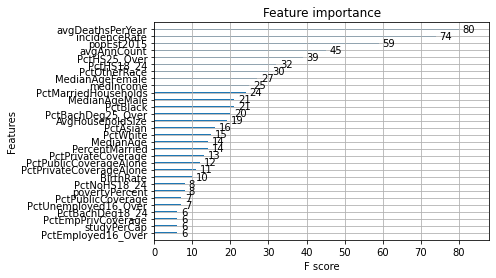

<Figure size 1440x1080 with 0 Axes>

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 0, objective ='reg:linear' )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)
feature_imp = pd.DataFrame({"Features": X_train.columns,
                             "Importance score":xgb_model.feature_importances_})

# printing the features with importance score in descending order
print(feature_imp.sort_values(by="Importance score", ascending = False))

# plot feature importance
plot_importance(xgb_model, )
plt.figure(figsize=[20,15])
plt.show()


In [ ]:
# play around with various values of theshold till you get a suitable one
selection = SelectFromModel(xgb_model, threshold=0.013) # score = 245.9

selection.fit(X_train, y_train)

print(selection.threshold_)
# Transform the train and test features
select_X_train = selection.transform(X_train)
select_test_data = selection.transform(test_data) 

# train model
# hyperparameters have been choosen through hit and trial process, Grid search or random search can also be used instead.
selection_model = XGBRegressor(objective='reg:linear', learning_rate = 0.4,gamma = 7, n_estimators=320, max_depth=3, min_child_weight=2,
                               reg_alpha = 1 )
selection_model.fit(select_X_train, y_train)

[18:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.013
[18:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=7,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=2, missing=None, n_estimators=320,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# predicting using XGB baseline model
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(test_data)


# predict for selected features of data using xgb
xgb_select_train_pred = selection_model.predict(select_X_train)
xgb_select_test_pred = selection_model.predict(select_test_data)      

**Evaluation**


In [ ]:
print("XGB\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(xgb_train_pred, y_train))
print("MSE: ", metrics.mean_squared_error(xgb_train_pred, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(xgb_train_pred, y_train)))
print("R2 score: ", metrics.r2_score(xgb_train_pred, y_train))


XGB

Training data
MAE:  10.044181414628879
MSE:  174.3927228851984
RMSE:  13.20578369068638
R2 score:  0.6172378123268256


In [ ]:
print("XGB with selected features\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(xgb_select_train_pred, y_train))
print("MSE: ", metrics.mean_squared_error(xgb_select_train_pred, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(xgb_select_train_pred, y_train)))
print("R2 score: ", metrics.r2_score(xgb_select_train_pred, y_train))


XGB with selected features

Training data
MAE:  2.249810525949804
MSE:  9.91449177670933
RMSE:  3.148728596864031
R2 score:  0.9862423485699355


In [ ]:
#xgb only
prediction = pd.DataFrame(xgb_test_pred, columns = ["prediction"])
prediction.to_csv("prediction_xgb.csv", index = False )
#score = 358

In [ ]:
#xgb selected
prediction = pd.DataFrame(xgb_select_test_pred, columns = ["prediction"])
prediction.to_csv("prediction_xgb_select.csv", index = False )
#score = 245.9

#### **Feature Importance using Random Forest**

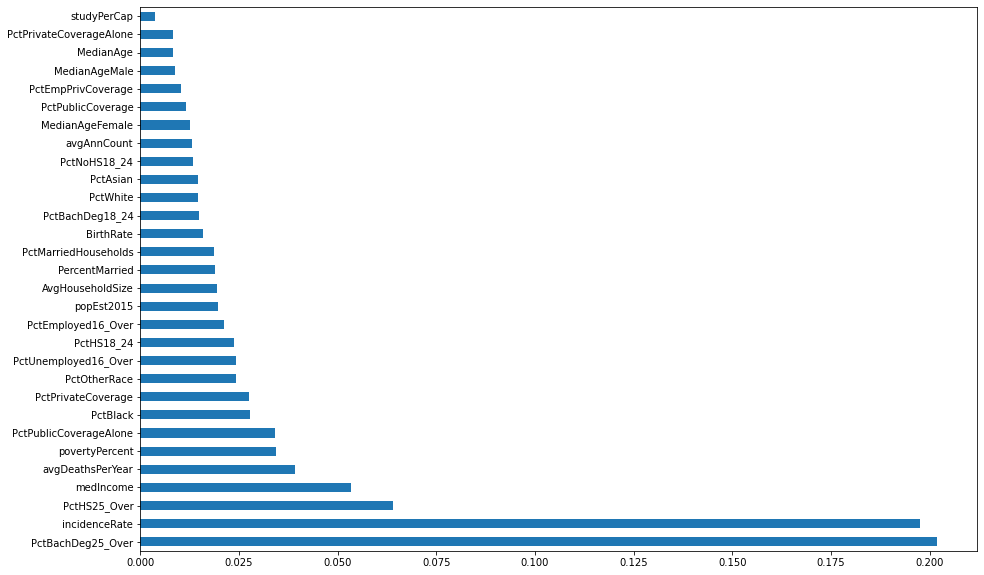

In [ ]:
random_forest_f = RandomForestRegressor(bootstrap= True,
                                      max_depth= 20,
                                      min_samples_leaf= 3,
                                      min_samples_split= 4,
                                      n_estimators= 200, 
                                      random_state=1)
random_forest_f.fit(X_train,y_train)

feat_imp = pd.Series(random_forest_f.feature_importances_,index = X_train.columns)
plt.figure(figsize=[15,10])
feat_imp.nlargest(30).plot(kind = "barh")
plt.show()

In [ ]:
# select the features based on the importance score
# create selection object
rf_selection = SelectFromModel(random_forest_f)

# train the selector
rf_selection = rf_selection.fit(X_train,y_train)

**Create a new subset of the data with only the selected features**

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.

X_important_train = rf_selection.transform(X_train)
X_important_test = rf_selection.transform(test_data)


In [ ]:
X_important_test.shape[1]

7

In [ ]:
# random forest model to work on selected features

rf_imp_model = RandomForestRegressor()
# train
rf_imp_model.fit(X_important_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# predicting

rf_imp_train_pred = rf_imp_model.predict(X_important_train)

rf_imp_test_pred = rf_imp_model.predict(X_important_test)

**Evaluation**

In [ ]:
print("Feature importance using random forest\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(rf_imp_train_pred, y_train))
print("MSE: ", metrics.mean_squared_error(rf_imp_train_pred, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(rf_imp_train_pred, y_train)))
print("R2 score: ", metrics.r2_score(rf_imp_train_pred, y_train))

Feature importance using random forest

Training data
MAE:  3.6696987872828557
MSE:  30.444104883972454
RMSE:  5.517617681932344
R2 score:  0.9502316628497315


In [ ]:
# rf feature importance

prediction = pd.DataFrame(rf_imp_test_pred, columns = ["prediction"])
prediction.to_csv("prediction_rf_imp.csv", index = False)
#score = 443

#### **Recursive feature elimination**

In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfr_1 = RandomForestRegressor()
rfe = RFE(rfr_1, step = 1) 
# estimator rfr_1 is the baseline model (basic model).
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
Selected Features: [False  True  True  True  True  True False False False False  True False
 False  True False  True  True  True  True  True False False False  True
 False  True False  True False False]
Feature Ranking: [ 7  1  1  1  1  1 16 15 12  4  1  3  6  1 10  1  1  1  1  1 13 14 11  1
  8  1  9  1  2  5]


**Representing feature ranks in the form of a table**

In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
19,PctPrivateCoverage,1
13,PctHS18_24,1
17,PctEmployed16_Over,1
10,AvgHouseholdSize,1
18,PctUnemployed16_Over,1
15,PctHS25_Over,1
25,PctBlack,1
23,PctPublicCoverageAlone,1
5,povertyPercent,1
4,popEst2015,1


**Create a new subset of the data with only the selected features**

In [ ]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
test_data_rfe = rfe.transform(test_data)

# Fitting our baseline model with the transformed data
rfr_rfe_model = rfr_1.fit(X_train_rfe, y_train)

**Prediction**

In [ ]:
train_rfe_pred = rfr_rfe_model.predict(X_train_rfe)

test_rfe_pred = rfr_rfe_model.predict(test_data_rfe)

**Evaluation**

In [ ]:
print("Recursive Feature elimination\n")
# for train data
print("Training data")
print("MAE: ", metrics.mean_absolute_error(train_rfe_pred, y_train))
print("MSE: ", metrics.mean_squared_error(train_rfe_pred, y_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(train_rfe_pred, y_train)))
print("R2 score: ", metrics.r2_score(train_rfe_pred, y_train))

Recursive Feature elimination

Training data
MAE:  3.43312782694198
MSE:  26.491313062930157
RMSE:  5.146971251418659
R2 score:  0.9568562770065483


In [ ]:
# rfe prediction file

prediction = pd.DataFrame(test_rfe_pred, columns = ["prediction"])
prediction.to_csv("prediction_rfe.csv", index = False)

## **Summary**

* Performed EDA on the given dataset.
* Data preperation steps included:
  1. Imputing outlierswith mean/meadian values.
  2. Filling the missing values in columns
  3. Creating new columns from the `binnedInc` column. (But this didnot improve performance)
  4. Dropped irrelevant columns.
  5. Scaled the data. (But this had no effect on the tree based model we used)
* Tried various baseline models.
* Performed hyperparameter tuning using grid search.
* Used various feature selection techniques to improve performance. 






## **Conclusion**

* Out of all the bseline models, Random forest regressor worked the best.
* Performing hyperparameter tuning on Random forest regressor did not show any improvement.
* Boruta selected 26 most important features while maintaining the same performance. Thus Boruta helped in reducing features.
*  Feature impotance using Random forest and Recursive Feature elimination technique did not show significant improvement.
* On the other hand, XGBoost Regressor showed promising results.
  1. The theshold value for feature selection in XGBoost can be finalised after some experimentation.
  2. The tuning of hyperparameters of the XGBoost model showed great improvement in the MSE score.

## Reference

* [Data analytics, visualisations and statistics]( https://github.com/dphi-official/Data_Science_Bootcamp/blob/master/Week1/Pandas_Exercises_Solutions.ipynb )
* [Data Visualisation](https://github.com/dphi-official/Data_Science_Bootcamp/blob/master/Week1/Data_Visualization_in_Python.ipynb)
* [Random forest regressor](https://docs.google.com/presentation/d/1zW4IU6j5XJC0QGDdFxWpvZMgra60ftpnCfZAFZpInTQ/edit#slide=id.ga61bb64689_0_0)
* [Ensemble models](https://docs.google.com/presentation/d/1RVZP4Ec7qMNjjUb0qrAQyjZDAW07_i_K1MzPHHhuPcg/edit#slide=id.ga549df25ae_0_0)
* [Evaluating a Regression Model](https://docs.google.com/presentation/d/1b8zWV1G8uAxia9SxEvnwsix0yXItDxC7T40bKTLLG4k/edit#slide=id.ga5686af583_0_0)
* [Feature selection](https://github.com/dphi-official/Data_Science_Bootcamp/blob/master/Week5/Feature_Selection_Techniques.ipynb)
* [XGBoost Parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
* [XGBoost hyperparameter tuning](https://towardsdatascience.com/from-zero-to-hero-in-xgboost-tuning-e48b59bfaf58)


